In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import time
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.cluster import DBSCAN

## Read Dataset

In [20]:
df = pd.read_csv('replace with clean_data_sh011')

In [21]:
df.head()

,cat2_slug,cat3_slug,city_slug,user_type,building_size,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,...,is_rebuilt,has_restroom,building_direction,has_pool,has_jacuzzi,has_sauna,flag,value,age,neighborhood_encoded
0,1.0,1.0,156.0,1.0,0.759023,0.716192,2.0,0.901074,0.690091,True,...,1.0,1.0,1.0,False,False,False,1.0,0.878685,8.0,0.829340
1,1.0,1.0,167.0,1.0,0.949033,0.523834,3.0,0.901074,0.000000,True,...,0.0,2.0,2.0,False,False,False,1.0,1.000000,1.0,0.955061
2,1.0,1.0,262.0,1.0,0.801893,0.231800,2.0,0.901074,0.000000,True,...,1.0,1.0,2.0,False,False,False,1.0,0.943877,12.0,0.865963
3,0.0,0.0,241.0,1.0,0.853956,0.523834,2.0,0.159203,0.275170,True,...,1.0,2.0,2.0,False,False,False,2.0,0.664199,6.0,0.862980
4,0.0,0.0,241.0,1.0,0.853956,0.523834,2.0,0.159203,0.275170,True,...,1.0,2.0,2.0,False,False,False,0.0,0.875021,6.0,0.862980


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171996 entries, 0 to 171995
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cat2_slug             171996 non-null  float64
 1   cat3_slug             171996 non-null  float64
 2   city_slug             171996 non-null  float64
 3   user_type             171996 non-null  float64
 4   building_size         171996 non-null  float64
 5   floor                 171996 non-null  float64
 6   rooms_count           171996 non-null  float64
 7   total_floors_count    171996 non-null  float64
 8   unit_per_floor        171996 non-null  float64
 9   has_balcony           171996 non-null  bool   
 10  has_elevator          171996 non-null  bool   
 11  has_warehouse         171996 non-null  bool   
 12  has_parking           171996 non-null  bool   
 13  is_rebuilt            171996 non-null  float64
 14  has_restroom          171996 non-null  float64
 15  

# Task2

###### Using Both Elbow Method & silhouette score

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int8']).columns.tolist()


## Kmeans

In [23]:
X = df

In [24]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

### Finding the best k based on Elbow

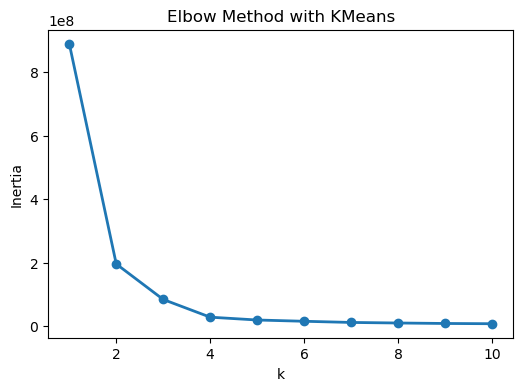

In [25]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, 'o-', linewidth=2)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method with KMeans")
plt.show()

#### k = 4

In [35]:
best_k = 4
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_pred = final_kmeans.fit_predict(X)

In [36]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(final_kmeans.cluster_centers_)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


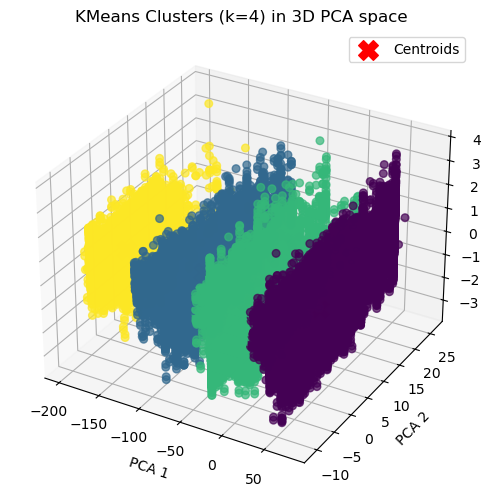

In [37]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], 
           c=y_pred, cmap="viridis", s=30, alpha=0.7)
ax.scatter(centroids_pca[:,0], centroids_pca[:,1], centroids_pca[:,2],
           c="red", marker="X", s=200, label="Centroids")

ax.set_title(f"KMeans Clusters (k={best_k}) in 3D PCA space")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.legend()
plt.show()


### Finding the best k based on Silhouette

In [29]:
sample_size = 5000
if X.shape[0] > sample_size:
    X_sample = X.sample(sample_size, random_state=42)
else:
    X_sample = X

sil_scores = []
K_range = range(2, 11)

start_time = time.time()

In [30]:
for i, k in enumerate(K_range, 1):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024, n_init=5)
    labels = kmeans.fit_predict(X)

    # silhouette score only on sample
    score = silhouette_score(X_sample, kmeans.predict(X_sample))
    sil_scores.append(score)

    elapsed = time.time() - start_time
    print(f"[{i}/{len(K_range)}] k={k} done | silhouette={score:.4f} | elapsed={elapsed:.1f}s")

print("\nSilhouette scores:", sil_scores)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[1/9] k=2 done | silhouette=0.7270 | elapsed=2.3s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[2/9] k=3 done | silhouette=0.7225 | elapsed=2.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[3/9] k=4 done | silhouette=0.7775 | elapsed=3.2s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[4/9] k=5 done | silhouette=0.5635 | elapsed=3.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[5/9] k=6 done | silhouette=0.7183 | elapsed=3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[6/9] k=7 done | silhouette=0.5701 | elapsed=4.4s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[7/9] k=8 done | silhouette=0.5030 | elapsed=4.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[8/9] k=9 done | silhouette=0.5082 | elapsed=5.2s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[9/9] k=10 done | silhouette=0.5649 | elapsed=5.7s

Silhouette scores: [np.float64(0.7269929055485177), np.float64(0.722485855895509), np.float64(0.7775497186826604), np.float64(0.5634953910961311), np.float64(0.7183039140752763), np.float64(0.5701292402504369), np.float64(0.5030142460848535), np.float64(0.5081516289726654), np.float64(0.5648893884186134)]


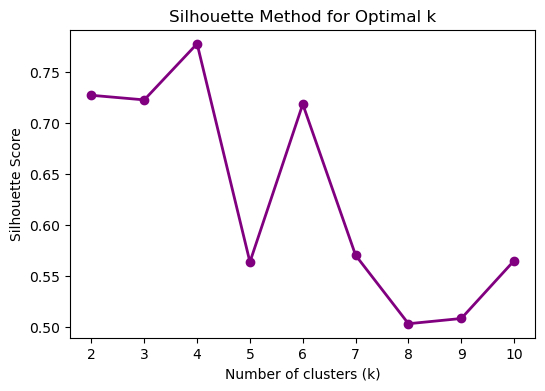

In [31]:
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, 'o-', linewidth=2, color="purple")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()


In [32]:
best_k = 4
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_pred = final_kmeans.fit_predict(X)

In [33]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(final_kmeans.cluster_centers_)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


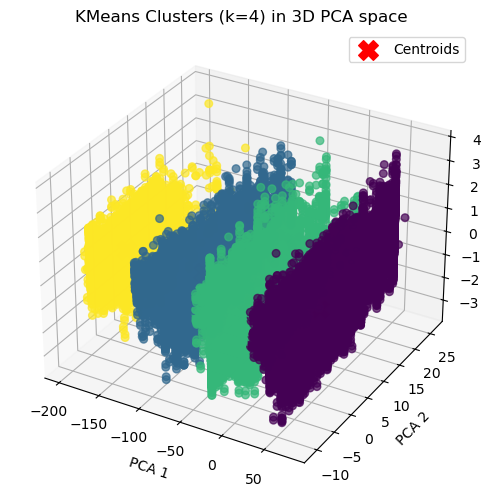

In [34]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], 
           c=y_pred, cmap="viridis", s=30, alpha=0.7)
ax.scatter(centroids_pca[:,0], centroids_pca[:,1], centroids_pca[:,2],
           c="red", marker="X", s=200, label="Centroids")

ax.set_title(f"KMeans Clusters (k={best_k}) in 3D PCA space")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.legend()
plt.show()

#### By the results in both silhouette score and Elbow Method the best K is 4